In [15]:
import numpy as np
import matplotlib.pyplot as plt

**Exercise 3a**

In [3]:
def euler_maruyama(T, xi, W):
    N = W.shape[0] - 1         # Number of equally spaced time intervals
    Delta = T / N              # Length of equally spaced time intervals
    M = W.shape[1]             # Number of samples

    # Define the coefficients of the SDE
    mu = lambda x: np.log(1 + x**2)
    sigma = lambda x: x * (x > 0)

    # Initialize Y with the initial condition
    Y = np.full((1, M), xi)

    # Euler-Maruyama iteration
    for i in range(N):
        dW = W[i + 1, :] - W[i, :]   # Increments of the M one-dimensional Brownian motions
        Y = Y + mu(Y) * Delta + sigma(Y) * dW   # M realizations of the Euler-Maruyama approximation at t=i*Delta

    return Y

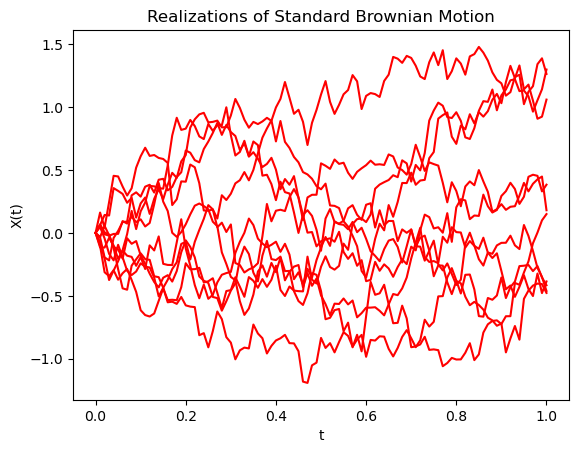

In [23]:
M = 10
N = 100    
T = 1  
Delta = T / N  

# Shape (N+1, M), where each column is a path
W = np.zeros((N+1, M))  

# Generate Brownian motion paths
for i in range(M):
    normal_rv = np.random.normal(0, np.sqrt(Delta), N)
    W[1:, i] = np.cumsum(normal_rv)

time = np.linspace(0, T, N+1)
plt.plot(time, W, 'r')
plt.xlabel('t')
plt.ylabel('X(t)')
plt.title('Realizations of Standard Brownian Motion')
plt.show()


In [31]:
Y = euler_maruyama(T, 1, W)
print(Y)

[[4.34095675 0.82424565 1.58087007 1.13072116 0.65848023 4.47930484
  0.79442042 0.66826551 3.29723004 1.73763302]]


**Exercise 3b)**

In [90]:
def EM_L2_convergence(L = 4):
    # Number of samples
    M = 10**5           
    # Final time
    T = 1.0             
    # Initial condition
    xi = 1            
    
    # Generation of M sample paths of a Brownian motion at the finest grid points
    # Number of steps on the finest level
    Nmax = 10 * 2**L 
    np.random.seed(123)
    h_min = T / Nmax
    W = np.vstack([np.zeros(M), np.cumsum(np.random.normal(0, np.sqrt(h_min), (Nmax, M)), axis=0)])
    
    Y_diff = np.zeros(L)
    
    # Loop over all levels
    YT_previous = 0
    for l in range(L + 1):
        N = 10 * 2**l
        partition = 2**(L - l) * np.arange(N + 1)
        # Extract M sample paths of the Brownian motion at grid points with time step size 1/(10*2^l)
        part_w = W[partition, :]            
        # M realizations of the Euler-Maruyama approximation at t=T with time step size 1/(10*2^l)
        YT = euler_maruyama(T, xi, part_w) 
    
        if l > 0:
            Y_diff[l - 1] = np.sqrt(np.mean(np.abs(YT - YT_previous)**2))
        YT_previous = YT
    
    # Strong convergence rate
    log_step = np.log(1 / (10 * 2 ** np.arange(L)))
    log_YTdiff = np.log(Y_diff)
    
    # Fitted line to log(Delta) vs log(YTdiff) to estimate the strong convergence rate
    r = np.polyfit(log_step, log_YTdiff, 1)

    return r[0]

r = EM_L2_convergence(4)
print(f'Empirical strong rate of convergence in L^2: {r}')


Empirical strong rate of convergence in L^2: 0.46426522233276785


So, based on the Hint and the fitted polynomial, we can estimate that alpha=0.464, hence the convergence rate is around 0.5. This matches the theoretical assumptions made in the lecture notes regarding the EM convergence rate.

We can see how, as we increase the maximum level L, we get better approximation of the convergence rate, tending to 0.5:

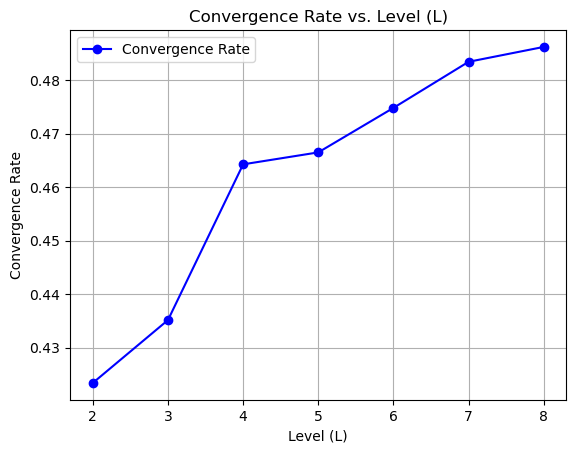

In [96]:
L = [2,3,4,5,6,7,8]
convergence_rates = np.zeros(len(L))
for i in range(len(L)):
    convergence_rates[i] = EM_L2_convergence(L[i]) 

plt.plot(L, convergence_rates, marker='o', color='b', linestyle='-', label='Convergence Rate')
plt.xlabel('Level (L)')
plt.ylabel('Convergence Rate')
plt.title('Convergence Rate vs. Level (L)')
plt.grid(True)
plt.legend()
plt.show()